___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [1]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from warnings import filterwarnings
filterwarnings('ignore')
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Birgül\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Birgül\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Birgül\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

DataFrame.to_csv(path_or_buf=None, sep=',', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None, compression='infer', quoting=None, quotechar='"', lineterminator=None, chunksize=None, date_format=None, doublequote=True, escapechar=None, decimal='.', errors='strict', storage_options=None)[source]
burada index=False yapmak gerekiyor yeni bir index olusmasin diye

In [3]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv", index_col=0)


In [4]:
df.shape

(23486, 10)

In [5]:

df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### Data Wrangling

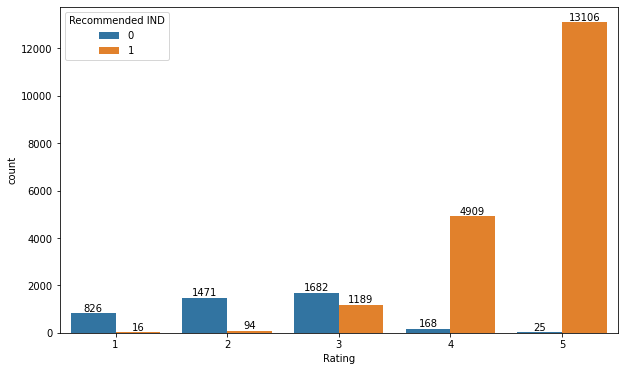

In [6]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x="Rating", data=df, hue = "Recommended IND")
for p in ax.containers:
        ax.bar_label(p)

In [7]:
df["Recommended IND"].unique()

array([1, 0], dtype=int64)

In [8]:
df = df[~((df["Rating"] == 3) & (df["Recommended IND"] == 1))]

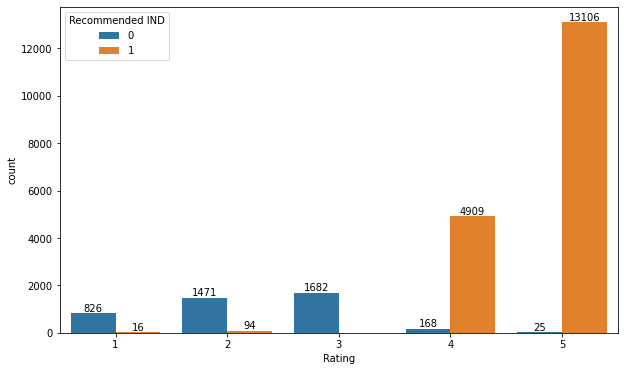

In [9]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x="Rating", data=df, hue = "Recommended IND")
for p in ax.containers:
        ax.bar_label(p)

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

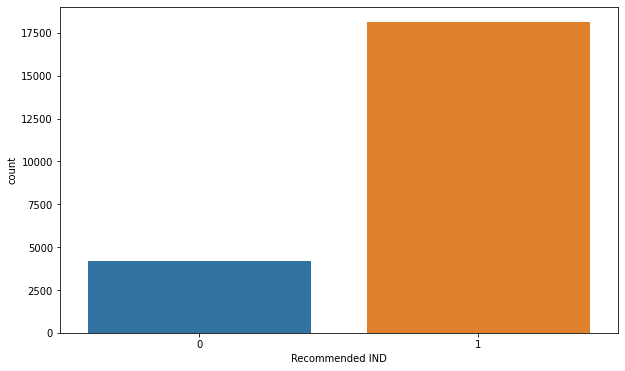

In [10]:
plt.fig = plt.figure(figsize = (10,6))
sns.countplot(x="Recommended IND", data=df);

In [11]:
df["Recommended IND"].value_counts()

1    18125
0     4172
Name: Recommended IND, dtype: int64

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [12]:
df.rename(columns={"Review Text":"text", "Recommended IND":"label"}, inplace=True)

In [13]:
df.head()

,Clothing ID,Age,Title,text,Rating,label,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [14]:
df=df[['text','label']]
df.head()

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


---
---


### Missing Value Detection

In [15]:
df.isnull().sum()

text     826
label      0
dtype: int64

In [16]:
df.dropna(inplace = True)
df

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
23478,I was surprised at the positive reviews for th...,0
23479,So i wasn't sure about ordering this skirt bec...,1
23481,I was very happy to snag this dress at such a ...,1
23483,"This fit well, but the top was very see throug...",0


---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [17]:
stop_words = stopwords.words("english")

In [18]:
def cleaning(data):
    
   
    text_tokens = word_tokenize(data.replace("'", "").lower())
    
   
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
   
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
   
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
   
    return " ".join(text_cleaned)

In [19]:
df2 = df.copy()

In [20]:
df2["text"] = df2["text"].apply(cleaning)
df2["text"].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: text, dtype: object

In [21]:
" ".join(df2["text"]).split()

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 's

In [22]:
rare_words = pd.Series(" ".join(df2["text"]).split()).value_counts()
rare_words

dress          10711
fit             9619
size            8805
love            8703
top             7792
               ...  
shirtsleeve        1
awate              1
intuition          1
presumptive        1
platinum           1
Length: 11719, dtype: int64

In [23]:
rare_words = rare_words[rare_words <= 2] 

In [24]:
rare_words

professorial    2
effective       2
strawberry      2
gianormous      2
kill            2
               ..
shirtsleeve     1
awate           1
intuition       1
presumptive     1
platinum        1
Length: 6364, dtype: int64

In [25]:
rare_words.index

Index(['professorial', 'effective', 'strawberry', 'gianormous', 'kill',
       'willowy', 'flattening', 'utilitarian', 'tolerance', 'rushing',
       ...
       'whiplash', 'buxom', 'absence', 'neighboring', 'olsen', 'shirtsleeve',
       'awate', 'intuition', 'presumptive', 'platinum'],
      dtype='object', length=6364)

In [26]:
df2["text"] = df2["text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
df2["text"].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: text, dtype: object

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [27]:
positive_sentences = df[df["label"] == 1]["text"]
positive_sentences

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
6        I aded this in my basket at hte last mintue to...
                               ...                        
23476    These bottoms are very cute but defiantly chee...
23477    I'm so impressed with the beautiful color comb...
23479    So i wasn't sure about ordering this skirt bec...
23481    I was very happy to snag this dress at such a ...
23485    This dress in a lovely platinum is feminine an...
Name: text, Length: 17370, dtype: object

In [28]:
negative_sentences = df[df["label"] == 0]["text"]
negative_sentences

2        I had such high hopes for this dress and reall...
5        I love tracy reese dresses, but this one is no...
10       Dress runs small esp where the zipper area run...
22       First of all, this is not pullover styling. th...
25       Loved the material, but i didnt really look at...
                               ...                        
23449    I tried these on because the color is really p...
23450    I wanted to love this jacket. so soft and grea...
23460    I purchased this for a very good price and i t...
23478    I was surprised at the positive reviews for th...
23483    This fit well, but the top was very see throug...
Name: text, Length: 4101, dtype: object

### Collect Words (positive and negative separately)

In [29]:
positive_words = " ".join(positive_sentences)
positive_words[:100]

"Absolutely wonderful - silky and sexy and comfortable Love this dress!  it's sooo pretty.  i happene"

In [30]:
negative_words = " ".join(negative_sentences)
negative_words[:100]

'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the pe'

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [31]:
from wordcloud import WordCloud

In [32]:
wordcloud_positive = WordCloud(background_color="white", max_words =250)

In [33]:
wordcloud_positive.generate(positive_words)

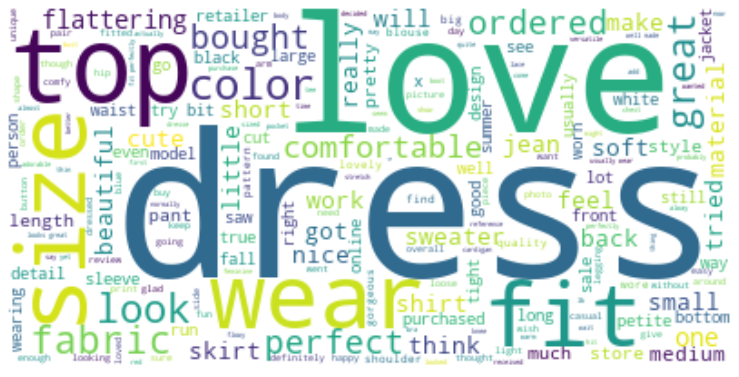

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(wordcloud_positive, interpolation="bilinear",)
plt.axis("off")
plt.show()

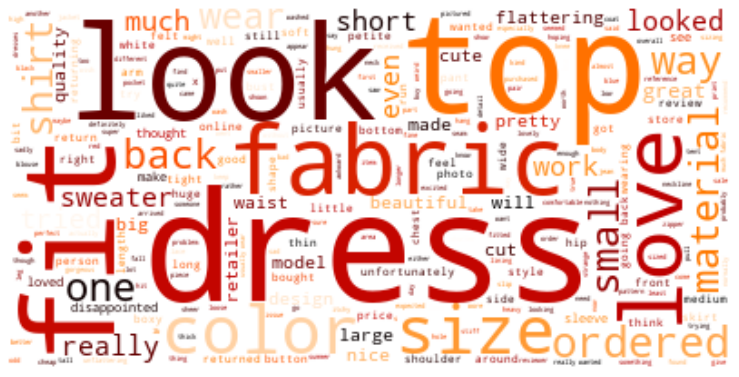

In [35]:
wordcloud_negative = WordCloud(background_color="white", max_words=250, colormap='gist_heat')

wordcloud_negative.generate(negative_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = df2["text"]
y= df2["label"]

In [38]:
y = y.map({0:1, 1:0})

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)  
X_test_count = vectorizer.transform(X_test)

In [42]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [43]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names())

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,absolutley,...,yummy,zero,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17172,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:
tf_idf_vectorizer = TfidfVectorizer()
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [46]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names())

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,absolutley,...,yummy,zero,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score

In [49]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

## Logistic Regression

### CountVectorizer

In [50]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101)
log.fit(X_train_count,y_train)

LogisticRegression(C=0.6, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [51]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[3122  353]
 [ 157  663]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      3475
           1       0.65      0.81      0.72       820

    accuracy                           0.88      4295
   macro avg       0.80      0.85      0.82      4295
weighted avg       0.89      0.88      0.89      4295

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     13895
           1       0.78      0.96      0.86      3281

    accuracy                           0.94     17176
   macro avg       0.88      0.95      0.91     17176
weighted avg       0.95      0.94      0.94     17176



In [52]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        log_count_rec = scores
    elif i == "f1-1":
        log_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8889718510302034

 precision-0          score for count : 0.9560758262334227

 recall-0             score for count : 0.9043540977153481

 f1-0                 score for count : 0.929469518619554

 precision-1          score for count : 0.6705949749723172

 recall-1             score for count : 0.8238379420268368

 f1-1                 score for count : 0.7391385255303418



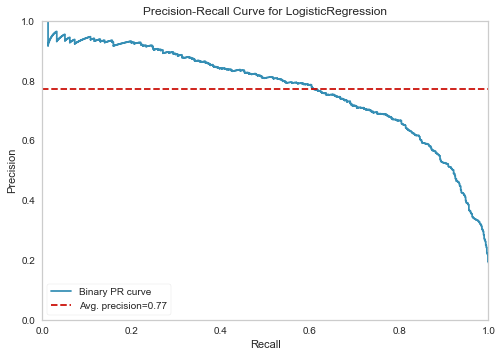

In [53]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
    LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [54]:
log_AP_count = viz.score_

### TF-IDF

In [55]:
log = LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [56]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[3003  472]
 [ 113  707]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3475
           1       0.60      0.86      0.71       820

    accuracy                           0.86      4295
   macro avg       0.78      0.86      0.81      4295
weighted avg       0.89      0.86      0.87      4295

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     13895
           1       0.62      0.90      0.74      3281

    accuracy                           0.88     17176
   macro avg       0.80      0.88      0.83     17176
weighted avg       0.91      0.88      0.89     17176



In [57]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced")
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        log_tfidf_rec = scores
    elif i == "f1-1":
        log_tfidf_f1 = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8821605556433202

 precision-0          score for tfidf : 0.9664231074398973

 recall-0             score for tfidf : 0.8851383687866121

 f1-0                 score for tfidf : 0.9239690272183759

 precision-1          score for tfidf : 0.6414240188001609

 recall-1             score for tfidf : 0.8695631625769146

 f1-1                 score for tfidf : 0.738094760835765



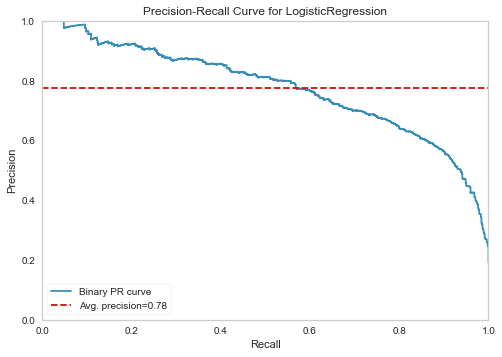

In [58]:
viz = PrecisionRecallCurve(
    LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced"),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [59]:
log_AP_tfidf = viz.score_

## Naive Bayes 

### Countvectorizer

In [60]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB()
nb.fit(X_train_count,y_train)

MultinomialNB()

In [61]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[3194  281]
 [ 183  637]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      3475
           1       0.69      0.78      0.73       820

    accuracy                           0.89      4295
   macro avg       0.82      0.85      0.83      4295
weighted avg       0.90      0.89      0.89      4295

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     13895
           1       0.76      0.84      0.80      3281

    accuracy                           0.92     17176
   macro avg       0.86      0.89      0.87     17176
weighted avg       0.92      0.92      0.92     17176



In [62]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = MultinomialNB()
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        nb_count_rec = scores
    elif i == "f1-1":
        nb_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8991606905674475

 precision-0          score for count : 0.9490679062881581

 recall-0             score for count : 0.9250078986486836

 f1-0                 score for count : 0.9368691923678678

 precision-1          score for count : 0.7135104278445384

 recall-1             score for count : 0.7897036474164134

 f1-1                 score for count : 0.7495163627966175



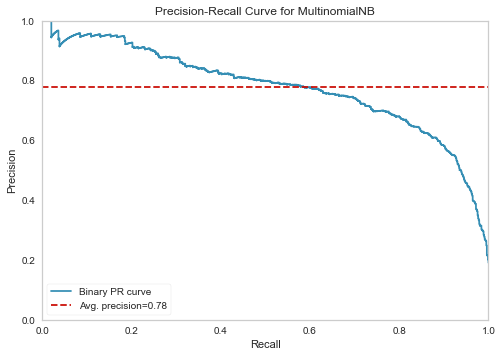

In [63]:
viz = PrecisionRecallCurve(
    MultinomialNB(),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [64]:
nb_AP_count = viz.score_

### TF-IDF

In [65]:
nb = BernoulliNB()
nb.fit(X_train_tf_idf,y_train)

BernoulliNB()

In [66]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[3173  302]
 [ 203  617]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      3475
           1       0.67      0.75      0.71       820

    accuracy                           0.88      4295
   macro avg       0.81      0.83      0.82      4295
weighted avg       0.89      0.88      0.88      4295

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     13895
           1       0.75      0.82      0.78      3281

    accuracy                           0.91     17176
   macro avg       0.85      0.88      0.86     17176
weighted avg       0.92      0.91      0.91     17176



In [67]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = BernoulliNB()
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        nb_tfidf_rec = scores
    elif i == "f1-1":
        nb_tfidf_f1 = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8916505356623453

 precision-0          score for tfidf : 0.9421198233806194

 recall-0             score for tfidf : 0.9227766469329935

 f1-0                 score for tfidf : 0.9323349690584205

 precision-1          score for tfidf : 0.6993568922809835

 recall-1             score for tfidf : 0.7598348654459189

 f1-1                 score for tfidf : 0.7281931132776099



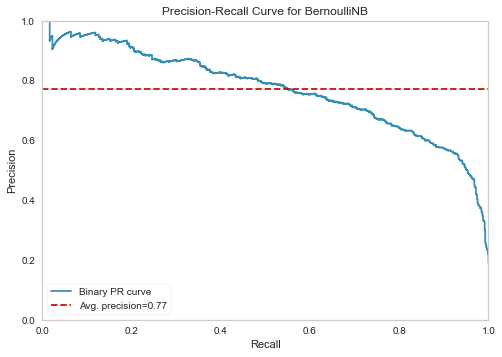

In [68]:
viz = PrecisionRecallCurve(
    BernoulliNB(),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [69]:
nb_AP_tfidf = viz.score_

## Support Vector Machine (SVM)

### Countvectorizer

In [70]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

In [71]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[3079  396]
 [ 144  676]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      3475
           1       0.63      0.82      0.71       820

    accuracy                           0.87      4295
   macro avg       0.79      0.86      0.82      4295
weighted avg       0.89      0.87      0.88      4295

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.91      0.95     13895
           1       0.71      0.93      0.81      3281

    accuracy                           0.91     17176
   macro avg       0.85      0.92      0.88     17176
weighted avg       0.93      0.91      0.92     17176



In [72]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        svc_count_rec = scores
    elif i == "f1-1":
        svc_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8852460466891721

 precision-0          score for count : 0.9626441888660524

 recall-0             score for count : 0.8928388520285283

 f1-0                 score for count : 0.9263970468173115

 precision-1          score for count : 0.6531067733837619

 recall-1             score for count : 0.8531006746237674

 f1-1                 score for count : 0.7396029350372284



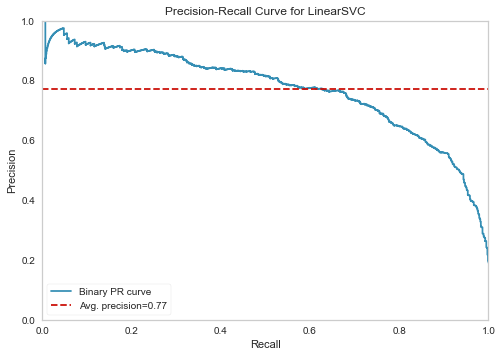

In [73]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.01, class_weight="balanced", random_state=101),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [74]:
svc_AP_count = viz.score_

### TD-IDF

In [75]:
svc = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

In [76]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[2995  480]
 [ 110  710]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3475
           1       0.60      0.87      0.71       820

    accuracy                           0.86      4295
   macro avg       0.78      0.86      0.81      4295
weighted avg       0.89      0.86      0.87      4295

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     13895
           1       0.62      0.90      0.73      3281

    accuracy                           0.88     17176
   macro avg       0.80      0.88      0.83     17176
weighted avg       0.91      0.88      0.88     17176



In [77]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        svc_tfidf_rec = scores
    elif i == "f1-1":
        svc_tfidf_f1 = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8642865327414752

 precision-0          score for tfidf : 0.9658342046041005

 recall-0             score for tfidf : 0.8628276126399097

 f1-0                 score for tfidf : 0.9113989013006758

 precision-1          score for tfidf : 0.5997941750501339

 recall-1             score for tfidf : 0.8704787234042553

 f1-1                 score for tfidf : 0.7100605736981256



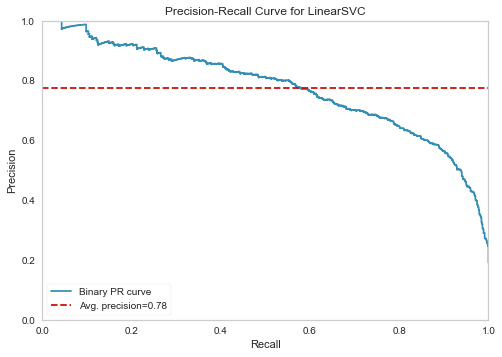

In [78]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.01, class_weight="balanced", random_state=101),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [79]:
svc_AP_tfidf = viz.score_

## Random Forest

### Countvectorizer

In [80]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=12, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [81]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[3047  428]
 [ 178  642]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      3475
           1       0.60      0.78      0.68       820

    accuracy                           0.86      4295
   macro avg       0.77      0.83      0.79      4295
weighted avg       0.88      0.86      0.87      4295

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     13895
           1       0.69      0.89      0.78      3281

    accuracy                           0.90     17176
   macro avg       0.83      0.90      0.86     17176
weighted avg       0.92      0.90      0.91     17176



In [82]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = RandomForestClassifier(n_estimators=200, max_depth = 12, random_state = 42, class_weight="balanced")
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        rf_count_rec = scores
    elif i == "f1-1":
        rf_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8678968718620818

 precision-0          score for count : 0.9483687864217064

 recall-0             score for count : 0.884923266570329

 f1-0                 score for count : 0.9155282532811644

 precision-1          score for count : 0.6202515166661933

 recall-1             score for count : 0.7957965749870265

 f1-1                 score for count : 0.696998979652725



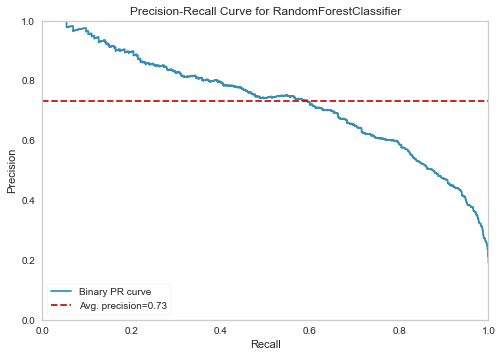

In [83]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced"),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [84]:
rf_AP_count = viz.score_

### TF-IDF

In [85]:
rf = RandomForestClassifier(200, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [86]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[2991  484]
 [ 164  656]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      3475
           1       0.58      0.80      0.67       820

    accuracy                           0.85      4295
   macro avg       0.76      0.83      0.79      4295
weighted avg       0.88      0.85      0.86      4295

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.89      0.93     13895
           1       0.66      0.89      0.76      3281

    accuracy                           0.89     17176
   macro avg       0.81      0.89      0.84     17176
weighted avg       0.91      0.89      0.90     17176



In [87]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = RandomForestClassifier(n_estimators= 200, max_depth = 10, random_state = 42,  class_weight="balanced")
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        rf_tfidf_rec = scores
    elif i == "f1-1":
        rf_tfidf_f1 = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.853749229610354

 precision-0          score for tfidf : 0.9478879838175935

 recall-0             score for tfidf : 0.8669311807573379

 f1-0                 score for tfidf : 0.905583994468989

 precision-1          score for tfidf : 0.5859957512073993

 recall-1             score for tfidf : 0.7979205278374973

 f1-1                 score for tfidf : 0.6756147009817581



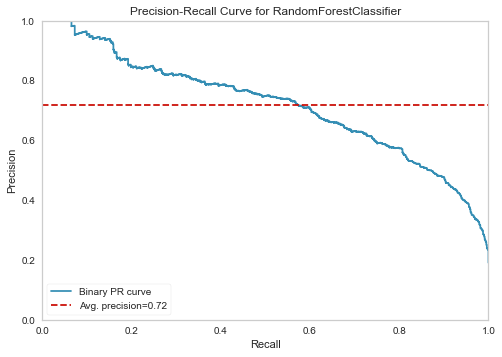

In [88]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(200, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced"),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [89]:
rf_AP_tfidf = viz.score_

## Ada Boosting

### Countvectorizer

In [90]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [91]:
print("Ada MODEL")

eval(ada, X_train_count, X_test_count)

Ada MODEL
[[3301  174]
 [ 314  506]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3475
           1       0.74      0.62      0.67       820

    accuracy                           0.89      4295
   macro avg       0.83      0.78      0.80      4295
weighted avg       0.88      0.89      0.88      4295

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     13895
           1       0.84      0.72      0.78      3281

    accuracy                           0.92     17176
   macro avg       0.89      0.84      0.86     17176
weighted avg       0.92      0.92      0.92     17176



In [92]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model =AdaBoostClassifier(n_estimators= 500, random_state = 42)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        ada_count_rec = scores
    elif i == "f1-1":
        ada_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8920580200867446

 precision-0          score for count : 0.9183712881293381

 recall-0             score for count : 0.9511335726235426

 f1-0                 score for count : 0.9344573992146525

 precision-1          score for count : 0.7562684284608836

 recall-1             score for count : 0.6418785677218474

 f1-1                 score for count : 0.6942352225490345



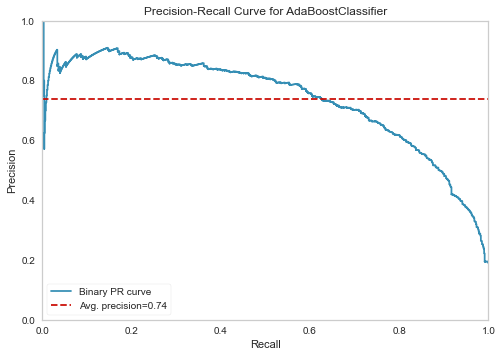

In [93]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)

viz.fit(X_train_count, y_train)
viz.score(X_test_count, y_test)
viz.show();

In [94]:
ada_AP_count = viz.score_

### TF-IDF

In [95]:
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [96]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[3264  211]
 [ 312  508]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      3475
           1       0.71      0.62      0.66       820

    accuracy                           0.88      4295
   macro avg       0.81      0.78      0.79      4295
weighted avg       0.87      0.88      0.88      4295

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     13895
           1       0.86      0.77      0.81      3281

    accuracy                           0.93     17176
   macro avg       0.90      0.87      0.89     17176
weighted avg       0.93      0.93      0.93     17176



In [99]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model =AdaBoostClassifier(n_estimators= 500, random_state = 42)
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        ada_tfidf_rec = scores
    elif i == "f1-1":
        ada_tfidf_f1 = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8873418455315367

 precision-0          score for tfidf : 0.916989405005632

 recall-0             score for tfidf : 0.9464562777423848

 f1-0                 score for tfidf : 0.9314680608594867

 precision-1          score for tfidf : 0.7381565957017893

 recall-1             score for tfidf : 0.6370014456223589

 f1-1                 score for tfidf : 0.6834639441053693



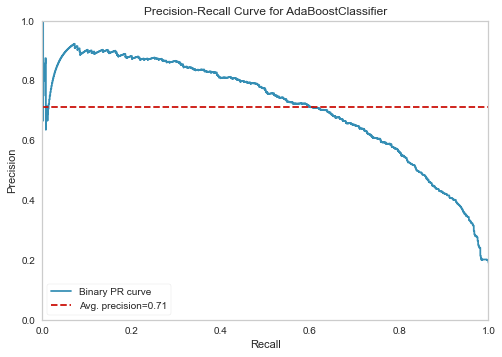

In [100]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [101]:
ada_AP_tfidf = viz.score_

## DL modeling

In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [104]:
df.head()

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


### Tokenization

In [105]:
X = df['text'].values
y = df['label'].map({0:1, 1:0}).values

In [106]:
num_words = 10000 
tokenizer = Tokenizer(num_words=num_words)

In [107]:
tokenizer.fit_on_texts(X)

### Creating word index

In [108]:
tokenizer.word_index 

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'so': 15,
 'was': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'wear': 31,
 'me': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 'or': 36,
 "i'm": 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'they': 41,
 'up': 42,
 'would': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'more': 49,
 'perfect': 50,
 'really': 51,
 'if': 52,
 'little': 53,
 'ordered': 54,
 'these': 55,
 'one': 56,
 'will': 57,
 'flattering': 58,
 'well': 59,
 'soft': 60,
 'an': 61,
 'out': 62,
 'can': 63,
 'back': 64,
 'comfortable': 65,
 'because': 66,
 'had': 67,
 'bought': 68,
 '\r': 69,
 'nice': 70,
 'cute': 71,
 'beautiful': 72,
 'than': 73,
 'fits': 74,
 'all': 75,
 'looks': 76,
 'when': 77,
 'bit': 78,
 'down': 79,


In [109]:
len(tokenizer.word_index) 

14483

### Converting tokens to numeric

In [110]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [111]:
X[100]

'The shirt is exactly as it is pictured, i have the burnt orange color and love it! i received numerous compliments both paired with jeans and tucked into a fun skirt. it fits true to size, as i normally wear a small in all retailer however it is the slightest bit tight in the shoulders. i would give this top a 5/5.'

In [112]:
print(X_num_tokens[100])

[1, 80, 6, 474, 30, 5, 6, 391, 2, 24, 1, 1897, 484, 47, 3, 21, 5, 2, 239, 2154, 199, 189, 550, 14, 90, 3, 865, 313, 4, 278, 109, 5, 74, 126, 8, 22, 30, 2, 240, 31, 4, 46, 9, 75, 102, 150, 5, 6, 1, 2876, 78, 149, 9, 1, 203, 2, 43, 319, 7, 25, 4, 264, 264]


In [113]:
len(X_num_tokens[100])

63

In [114]:
len(X_num_tokens[150])

30

In [115]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

### Maximum number of tokens for all documents¶

In [116]:
num_tokens.max()

116

In [117]:
num_tokens.mean() 

60.08271622188067

In [118]:
num_tokens.argmax()

15417

In [119]:
X[15417]

"I love maeve tops. i love the material and feel of this brand. when i saw the new tops that came out i ran to my local store to try one on. i'm usually a large in a top, once in a while an xl. they only had a large to try so i tried it in the black motif.\ni could barely get the top on. it looked like i was missing 1/2 of the top. i doubled checked the size and it was a large.\nit's a shame, the top is really cute. if you are the least bit broad or busty, go up a size or two. if you are usually a"

In [120]:
max_tokens = 106

In [121]:
sum(num_tokens < max_tokens) / len(num_tokens)

0.9853756229332589

### Fixing token counts of all documents (pad_sequences)

In [122]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

In [123]:
X_pad.shape

(21471, 106)

In [124]:
np.array(X_num_tokens[500])

array([  21,    1,  256,    3,    1,  119,    5,  557,    2,  556, 1992,
         14, 1614,  221,   66,    2,   24,    4,  354,  198,   10,    7,
         56,  128,  190,   32,   48,  871,    2,  139,    7,   14,    1,
        703,  148,    2,  506,   24, 1129,  316,  160,   12,    5])

In [125]:
X_pad[500]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,   21,    1,  256,
          3,    1,  119,    5,  557,    2,  556, 1992,   14, 1614,  221,
         66,    2,   24,    4,  354,  198,   10,    7,   56,  128,  190,
         32,   48,  871,    2,  139,    7,   14,    1,  703,  148,    2,
        506,   24, 1129,  316,  160,   12,    5])

In [126]:
np.array(X_num_tokens[15417])

array([   2,   21,  764,  221,    2,   21,    1,   83,    3,  144,   13,
          7,  479,   77,    2,  191,    1,  439,  221,   20,  360,   62,
          2,  521,    8,   17,  483,  106,    8,  181,   56,   11,   37,
        107,    4,   81,    9,    4,   25,  422,    9,    4,  244,   61,
        416,   41,  115,   67,    4,   81,    8,  181,   15,    2,  104,
          5,    9,    1,  120,  765,    2,  117,  805,  113,    1,   25,
         11,    5,  162,   28,    2,   16, 1624,  523,  164,   13,    1,
         25,    2, 4014, 1773,    1,   22,    3,    5,   16,    4,   81,
         33,    4, 1378,    1,   25,    6,   51,   71,   52,   40,   27,
          1,  516,   78,  673,   36,  592,  145,   42,    4,   22,   36,
        265,   52,   40,   27,  107,    4])

In [127]:
X_pad[15417]

array([  13,    7,  479,   77,    2,  191,    1,  439,  221,   20,  360,
         62,    2,  521,    8,   17,  483,  106,    8,  181,   56,   11,
         37,  107,    4,   81,    9,    4,   25,  422,    9,    4,  244,
         61,  416,   41,  115,   67,    4,   81,    8,  181,   15,    2,
        104,    5,    9,    1,  120,  765,    2,  117,  805,  113,    1,
         25,   11,    5,  162,   28,    2,   16, 1624,  523,  164,   13,
          1,   25,    2, 4014, 1773,    1,   22,    3,    5,   16,    4,
         81,   33,    4, 1378,    1,   25,    6,   51,   71,   52,   40,
         27,    1,  516,   78,  673,   36,  592,  145,   42,    4,   22,
         36,  265,   52,   40,   27,  107,    4])

### Train Set Split

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
from keras.layers import Bidirectional

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.1, stratify=y, random_state=42)

### Modeling

In [131]:
model = Sequential()

In [132]:
embedding_size = 100 

In [133]:
model.add(Embedding(input_dim=num_words,        
                    output_dim=embedding_size,                                       
                    input_length=max_tokens,    
                    name='embedding_layer')) 

In [134]:
model.add(Bidirectional(GRU(units=48, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(units=48, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(units=48)))
model.add(Dense(1, activation='sigmoid'))

In [135]:
optimizer = Adam(lr=0.004)

In [136]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

In [137]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_layer (Embedding)  (None, 106, 100)         1000000   
                                                                 
 bidirectional (Bidirectiona  (None, 106, 96)          43200     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 106, 96)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 106, 96)          42048     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 106, 96)           0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 96)               4

In [138]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="auto", 
                           verbose=1, patience = 3, restore_best_weights=True)

In [139]:
pd.Series(y_train).value_counts(normalize=True) 

0    0.808984
1    0.191016
dtype: float64

In [140]:
weights = {0:19, 1:81}

In [141]:
model.fit(X_train, y_train, epochs=25, batch_size=128, class_weight=weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/25
151/151 [==============================] - 133s 812ms/step - loss: 13.4236 - recall: 0.8301 - val_loss: 0.3688 - val_recall: 0.8878
Epoch 2/25
151/151 [==============================] - 111s 734ms/step - loss: 7.5751 - recall: 0.9101 - val_loss: 0.3557 - val_recall: 0.8951
Epoch 3/25
151/151 [==============================] - 109s 724ms/step - loss: 5.2557 - recall: 0.9553 - val_loss: 0.2934 - val_recall: 0.8366
Epoch 4/25
151/151 [==============================] - 93s 618ms/step - loss: 4.1614 - recall: 0.9680 - val_loss: 0.2892 - val_recall: 0.7317
Epoch 5/25
151/151 [==============================] - 113s 751ms/step - loss: 3.2794 - recall: 0.9740 - val_loss: 0.3274 - val_recall: 0.7415
Epoch 6/25
151/151 [==============================] - 113s 752ms/step - loss: 2.3329 - recall: 0.9851 - val_loss: 0.3860 - val_recall: 0.7854
Epoch 7/25
151/151 [==============================] - 107s 711ms/step - loss: 1.9252 - recall: 0.9875 - val_loss: 0.4605 - val_recall: 0.7707
Epoch 

In [142]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,13.423610,0.830127,0.368776,0.887805
1,7.575127,0.910051,0.355695,0.895122
2,5.255663,0.955297,0.293398,0.836585
3,4.161411,0.968030,0.289187,0.731707
4,3.279356,0.973991,0.327421,0.741463


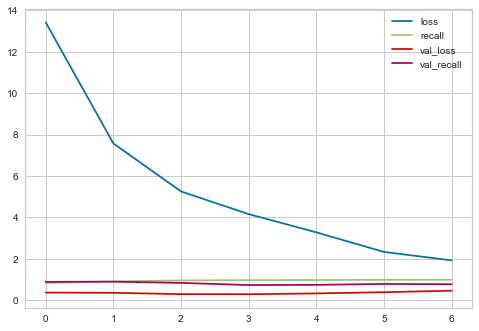

In [143]:
model_loss.plot();

In [144]:
model.evaluate(X_train, y_train)

604/604 [==============================] - 21s 34ms/step - loss: 0.0798 - recall: 0.9772


[0.07981956750154495, 0.9772419333457947]

In [145]:
model.evaluate(X_test, y_test) 

68/68 [==============================] - 2s 33ms/step - loss: 0.2892 - recall: 0.7317


[0.289186954498291, 0.7317073345184326]

In [146]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = (model.predict(X_train) >= 0.5).astype("int32")  

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

604/604 [==============================] - 22s 33ms/step
[[15200   432]
 [   84  3607]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     15632
           1       0.89      0.98      0.93      3691

    accuracy                           0.97     19323
   macro avg       0.94      0.97      0.96     19323
weighted avg       0.98      0.97      0.97     19323



In [147]:
y_pred = (model.predict(X_test) >= 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

68/68 [==============================] - 2s 32ms/step
[[1623  115]
 [ 110  300]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1738
           1       0.72      0.73      0.73       410

    accuracy                           0.90      2148
   macro avg       0.83      0.83      0.83      2148
weighted avg       0.90      0.90      0.90      2148



In [148]:
from sklearn.metrics import precision_recall_curve, average_precision_score

68/68 [==============================] - 2s 32ms/step


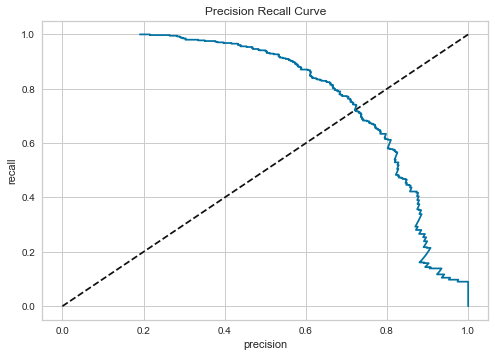

In [149]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision Recall Curve')
plt.show()

In [150]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

## BERT Modeling

In [151]:
!pip install transformers

You should consider upgrading via the 'C:\Users\Birgül\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [152]:
import tensorflow as tf
import os

### Tokenization

In [153]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [154]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# For every sentence...
max_token = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    
    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    max_token.append(len(input_ids))

print('Max sentence length: ', max(max_token))

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Max sentence length:  162


In [155]:
np.array(max_token).mean()

76.38512412090726

In [156]:
sum(np.array(max_token) <= 162) / len(max_token)

1.0

In [157]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.1, stratify=y, random_state=101)

In [158]:
def transformation(X):
  # set array dimensions
  seq_len = 162
  num_samples = len(X)

  # initialize empty zero arrays
  Xids = np.zeros((num_samples, seq_len))
  Xmask = np.zeros((num_samples, seq_len))

    
  for i, phrase in enumerate(X):
      tokens = tokenizer.encode_plus(phrase, max_length=seq_len, truncation=True,
                                      padding='max_length', add_special_tokens=True) 
      # assign tokenized outputs to respective rows in numpy arrays
      Xids[i] = tokens['input_ids']
      Xmask[i] = tokens['attention_mask']
  return Xids, Xmask

In [159]:
Xids_train, Xmask_train = transformation(X_train2)

Xids_test, Xmask_test = transformation(X_test2)

In [160]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)


Xids_train.shape  : (19323, 162)
Xmask_train.shape : (19323, 162)
Xids_test.shape   : (2148, 162)
Xmask_test.shape  : (2148, 162)


In [161]:
labels_train = y_train2.reshape(-1,1)
labels_train

array([[1],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]], dtype=int64)

In [162]:
labels_test = y_test2.reshape(-1,1)
labels_test

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

### Transformation text to tensor

In [163]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train, Xmask_train, labels_train))
dataset_train

<TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.float64, name=None), TensorSpec(shape=(162,), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [164]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test, Xmask_test, labels_test))
dataset_test

<TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.float64, name=None), TensorSpec(shape=(162,), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [165]:
def map_func(Xids, Xmask, labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Xids, 'attention_mask': Xmask}, labels

In [166]:
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

In [167]:
dataset_train

<MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.float64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [168]:
dataset_test

<MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.float64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [169]:
batch_size = 32

# batch_size 
# fit into a batch of 16
train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)

### Train test split

### Creating Model

In [171]:
def create_model():
    from transformers import TFAutoModel
    from tensorflow.keras.layers import Input, Dropout, Dense
    from tensorflow.keras import Model

    model = TFAutoModel.from_pretrained("bert-base-uncased")

    input_ids = Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = Dense(80, activation='relu')(embeddings) 
    x = Dropout(0.1, name="dropout")(x) #0.1
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    return Model(inputs=[input_ids, attention_mask], outputs=y)

### Model evaluation

### Compare Models F1 Scores, Recall Scores and Average Precision Score

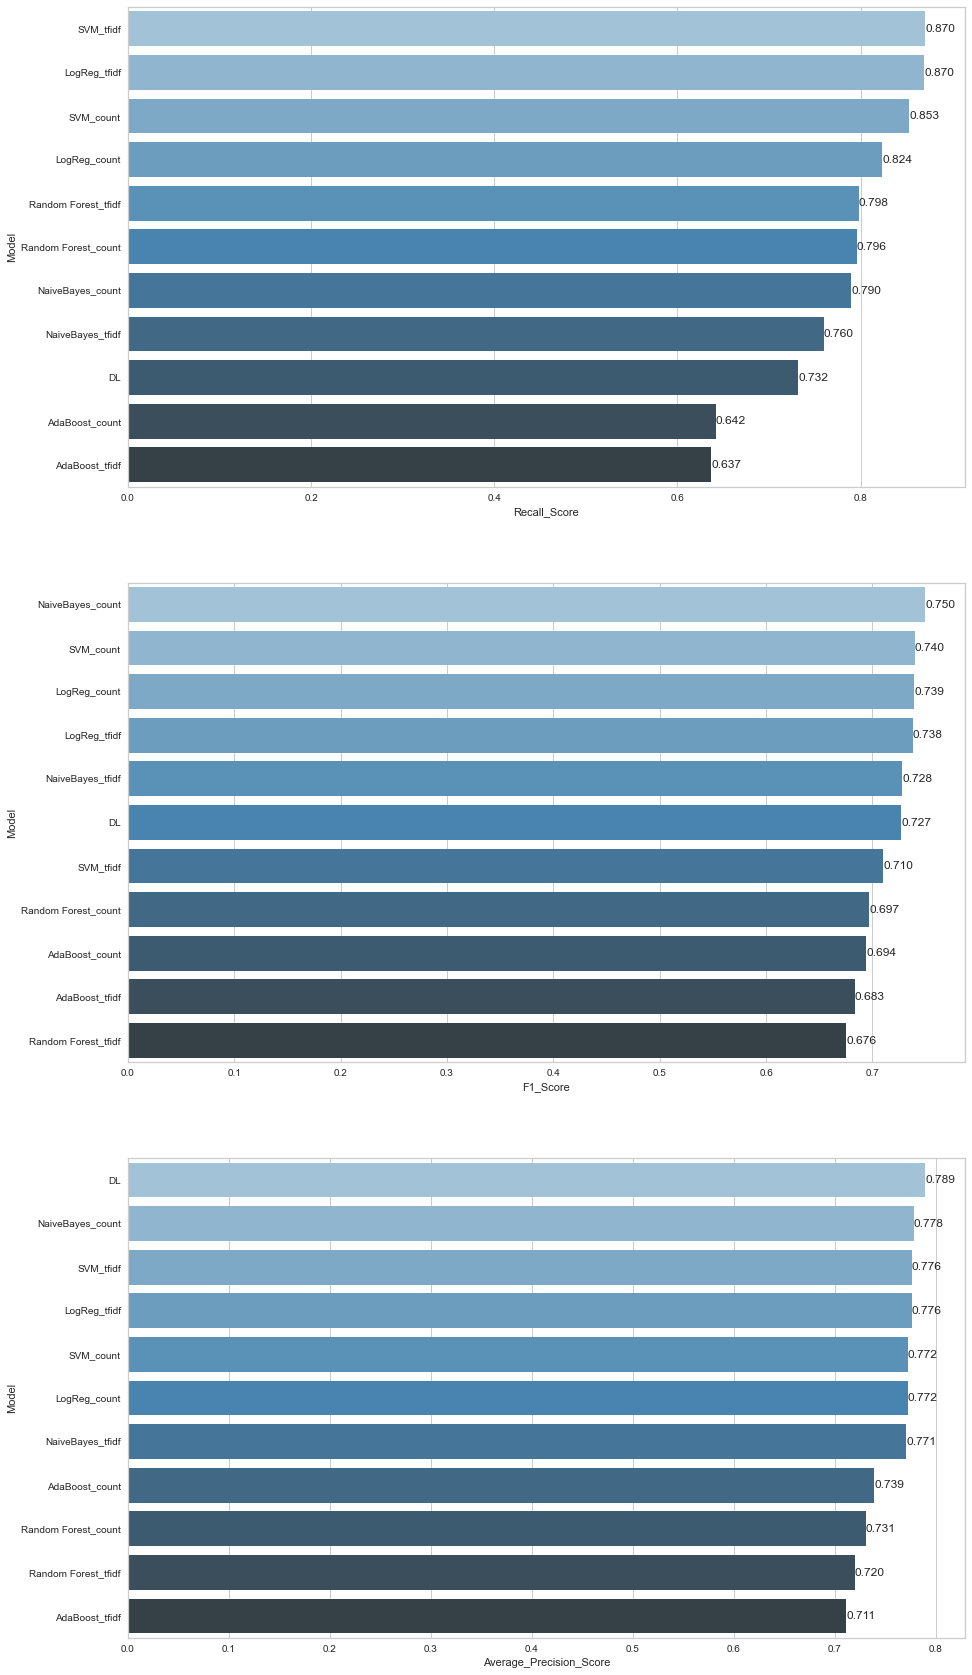

In [170]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count", 
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf", 
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "DL"],
                        
                        "F1_Score": [nb_count_f1, log_count_f1, svc_count_f1,
                                             rf_count_f1, ada_count_f1, nb_tfidf_f1, log_tfidf_f1,
                                             svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, DL_f1],
                        
                        "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec, 
                                                   rf_count_rec, ada_count_rec, 
                                                  nb_tfidf_rec, log_tfidf_rec, svc_tfidf_rec, 
                                                  rf_tfidf_rec, ada_tfidf_rec, DL_rec],
                        
                        "Average_Precision_Score": [nb_AP_count, log_AP_count, svc_AP_count, rf_AP_count,
                                                   ada_AP_count, nb_AP_tfidf, log_AP_tfidf, svc_AP_tfidf,
                                                   rf_AP_tfidf, ada_AP_tfidf, DL_AP]})

def labels(ax):
                        
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax=sns.barplot(x="Recall_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score", ascending=False)
ax=sns.barplot(x="Average_Precision_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show();

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___